
<a id='smoothing'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Suavização de Consumo e Impostos com Mercados Completos e Incompletos


<a id='index-0'></a>

## Conteúdo

- [Suavização de Consumo e Impostos com Mercados Completos e Incompletos](#Suavização-de-Consumo-e-Impostos-com-Mercados-Completos-e-Incompletos)  
  - [Resumo](#Resumo)  
  - [Base](#Base)  
  - [Modelo 1 (Mercados Completos)](#Modelo-1-%28Mercados-Completos%29)  
  - [Modelo 2 (Apenas Dívida de um Período Livre de Risco)](#Modelo-2-%28Apenas-Dívida-de-um-Período-Livre-de-Risco%29)  
  - [Exemplo: Suavização de Impostos com Mercados Completos](#Exemplo:-Suavização-de-Impostos-com-Mercados-Completos)  
  - [Versão de Espaço de Estado Linear No Modelo de Mercados Completos](#Versão-de-Espaço-de-Estado-Linear-No-Modelo-de-Mercados-Completos)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq, Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Esta aula descreve dois tipos de modelos de suavização, de consumo e de impostos:

- O primeiro é a tradição de **mercados completos** de Lucas e Stokey [[LS83]](https://julia.quantecon.org/../zreferences.html#lucasstokey1983).  
- O outro é a tradição de **mercados incompletos** de Hall [[Hal78]](https://julia.quantecon.org/../zreferences.html#hall1978) e Barro [[Bar79]](https://julia.quantecon.org/../zreferences.html#barro1979).  
- Mercados Completos* permitem que um consumidor ou governo compre ou venda dívidas contingentes em todos os estados possíveis do mundo.  
- Mercados incompletos* permitem que um consumidor ou governo compre ou venda apenas um conjunto limitado de valores mobiliários, geralmente apenas um único título livre risco. 


Hall [[Hal78]](https://julia.quantecon.org/../zreferences.html#hall1978) e Barro [[Bar79]](https://julia.quantecon.org/../zreferences.html#barro1979) assumiram que o único ativo que pode ser negociado é um título de  livre de risco de um período.

Hall assumiu um processo estocástico exógeno de receita não financeira e uma taxa bruta de juros exógena em uma dívida livre de risco de um período igual a
$ \beta^{-1} $, onde $ \beta \in (0,1) $ é também um fator de desconto intertemporal do consumidor.

Barro [[Bar79]](https://julia.quantecon.org/../zreferences.html#barro1979) fez uma suposição análoga a taxa de juros livre de risco em um modelo de suavização de impostos que consideramos isomórfico ao modelo de suavização de consumo de Hall.

Mantemos a premissa de Hall e Barro sobre a taxa de juros quando descrevemos uma versão incompleta do mercado de nosso modelo.

Além disso, estendemos sua suposição sobre a taxa de juros a uma contrapartida apropriada que usamos em um modelo de “mercados completos” no estilo de Lucas e Stokey. Embora estejamos igualmente interessados nos modelos de suavização de consumo e de tributação, na maioria das vezes nos concentramos explicitamente nas versões desses modelos.

Porém, para cada versão do modelo de suavização de consumo, há uma contraparte natural de suavização de impostos obtida simplesmente por [[LS83]](https://julia.quantecon.org/../zreferences.html#lucasstokey1983).

Embora estejamos igualmente interessados nos modelos de suavização de consumo e de tributação, na maioria das vezes nos concentramos explicitamente nas versões desses modelos.

Porém, para cada versão do modelo de suavização de consumo, há uma contraparte natural de suavização de impostos obtida simplesmente por:

- redefinir o consumo como arrecadação de impostos e a receita não financeira como despesa do governo.
- re-rotular a dívida do consumidor como *patrimônio* do governo.


Para elaborações sobre esse tema, consulte [Poupança Ótima II: Técnicas QL](https://julia.quantecon.org/perm_income_cons.html) e partes posteriores desta aula.

Consideraremos duas premissas alternativas estreitamente relacionadas sobre o processo de receita não financeira exógena do consumidor (ou na interpretação de suavização de impostos, o processo de despesa exógena do governo):

- que ele obedece a uma $ N $ finita  cadeia de Markov (sendo $ N=2 $ a maior parte do tempo).  
- que é descrito por um modelo linear de espaço de estados com um vetor de estado contínuo em $ {\mathbb R}^n $ conduzido por um processo de choque iid de vetor gaussiano.

Passaremos a maior parte desta aula estudando a especificação de Markov no estado finito, mas trataremos brevemente a especificação do espaço de estados linear antes de concluir.

### Relação com Outras Aulas

Esta aula pode ser vista como um acompanhamento de [Poupança Ótima II: Técnicas QL](https://julia.quantecon.org/perm_income_cons.html) e um aquecimento para um modelo de suavização de impostos descrito em [opt_tax_recur](https://julia.quantecon.org/../dynamic_programming_squared/opt_tax_recur.html).

Versões linear-quadráticas do modelo de suavização de impostos de Lucas-Stokey são descritas em [lqramsey](https://julia.quantecon.org/../dynamic_programming_squared/lqramsey.html).

As principais diferenças entre essas aulas e esta são:

- Aqui, o tomador de decisão considera todos os preços exógenos, o que significa que suas decisões não os afetam.
- Em [lqramsey](https://julia.quantecon.org/../dynamic_programming_squared/lqramsey.html) e [opt_tax_recur](https://julia.quantecon.org/../dynamic_programming_squared/opt_tax_recur.html), o tomador de decisão –  o governo no caso dessas aulas - reconhece que suas decisões afetam os preços.

Portanto, essas palestras posteriores são em parte sobre como o governo deve manipular os preços da dívida do governo.

## Base

Os resultados nos modelos de suavização de consumo (ou suavização de impostos) emergem de duas fontes:

- um tomador de decisão - um consumidor no modelo de suavização de consumo ou um governo no modelo de suavização de impostos - que deseja maximizar uma função objetivo intertemporal que expressa sua preferência por caminhos de consumo (ou coleções de impostos) que sejam suaves no sentido de não variar no tempo e nos estados de Markov.

- um conjunto de oportunidades de negociação que permitem ao otimizador transformar um processo não financeiro possivelmente irregular de receita (ou despesa do governo) em um processo mais suave de consumo (ou cobrança de impostos) comprando ou vendendo títulos financeiros.

Na versão do modelo de mercados completos, a cada período o consumidor pode comprar ou vender títulos contingentes com vencimento de um período a frente, cujos retornos dependem da realização do estado de Markov no próximo período.

No caso da cadeia Markov de dois estados, existem dois títulos por período.

Em um  estado de Markov $ N $ na versão de estado do modelo, $ N $ títulos são negociados a cada período.

Esses títulos contingentes de estado são comumente chamados de títulos Arrow, em homenagem a [Kenneth Arrow](https://en.wikipedia.org/wiki/Kenneth_Arrow) que primeiro teorizou sobre eles.

Na versão incompleta do modelo para mercados, o consumidor pode comprar e vender apenas um título a cada período, um título livre de risco com retorno bruto $ \beta^{-1} $.

### O Processo de Renda no Estado de Markov Finito

Em cada versão do modelo de suavização de consumo, a receita não financeira é governada por uma cadeia de Markov de dois estados (é fácil generalizar isso para $ N $ cadeias de estado de Markov).

Em particular, o *estado do mundo* é dado por $ s_t $ que segue uma cadeia de Markov com matriz de probabilidade de transição

$$
P_{ij} = \mathbb P \{s_{t+1} = \bar s_j \,|\, s_t = \bar s_i \}
$$

A renda não financeira $ \{y_t\} $ obedece:

$$
y_t =
\begin{cases}
    \bar y_1 & \quad \text{se } s_t = \bar s_1 \\
    \bar y_2 & \quad \text{se } s_t = \bar s_2
\end{cases}
$$

Um consumidor deseja maximizar,


<a id='equation-cs-1'></a>
$$
\mathbb E
\left[
    \sum_{t=0}^\infty \beta^t u(c_t)
\right]
\quad
\text{onde} \quad
u(c_t) = - (c_t -\gamma)^2
\quad \text{e} \quad
 0 < \beta < 1 \tag{1}
$$

#### Observação sobre isomorfismo

Podemos considerá-los modelos de suavização de impostos de Barro [[Bar79]](https://julia.quantecon.org/../zreferences.html#barro1979) se fizermos
$ c_t = T_t $ e $ G_t = y_t $, onde $ T_t $ é a arrecadação total de impostos $ \{G_t\} $ é um processo exógeno de despesas governamentais.

### Estrutura de Mercado

Os dois modelos diferem em quão efetivamente a estrutura de mercado permite que o consumidor transfira recursos ao longo do tempo e afirma Markov, havendo mais oportunidades de transferência no cenário de mercados completos do que no cenário incompleto.

Veja como essas diferenças nas oportunidades afetam:

- quão suave é o consumo ao longo do tempo e Markov afirma. 
- como o consumidor escolhe fazer com que seus níveis de endividamento se comportem ao longo do tempo e nos estados de Markov.

## Modelo 1 (Mercados Completos)

A cada período $ t \geq 0 $, o consumidor negocia **um perído a frente títulos de
Arrow**.

Assumimos que os preços desses títulos sejam exógenos para o consumidor (ou na versão de isenção de impostos do modelo, para o governo).

*Exógeno* significam que eles não são afetados pelo tomador de decisão

No estado de Markov $ s_t $ no período $ t $, uma unidade de consumo no estado $ s_{t+1} $ no momento $ t+1 $ custa $ q(s_{t+1} \,|\, s_t) $ unidades no momento $ t $ do consumo do bem.

No momento $ t=0 $, o consumidor começa com um nível herdado de dívida no momento $ 0 $ de $ b_0 $ unidades de tempo $ 0 $ do consumo do bem.

A restrição orcamentária do consumidor $ t \geq 0 $ no estado de Markov $ s_t $ é: 

$$
c_t + b_t
\leq y(s_t) +
\sum_j  q(\bar s_j \,|\, s_t ) \, b_{t+1}(\bar s_j \,|\, s_t)
$$

onde $ b_t $ é a dívida de um período do consumidor que vence no momento $ t $ e $ b_{t+1}(\bar s_j\,|\, s_t) $ são o tempo do consumidor
$ t $ as vendas do perído $ t+1 $ do consumo do bem no estado de Markov $ \bar s_j $, uma fonte de tempo $ t $ de receitas.

Uma análoga suposição de Hall de que a taxa de juros bruta livre de risco de um período é $ \beta^{-1} $ é:

<a id='equation-cs-2'></a>
$$
q(\bar s_j \,|\, \bar s_i) = \beta P_{ij} \tag{2}
$$

Para entender isso, observe que no estado $ \bar s_i $ custa $ \sum_j q(\bar s_j \,|\, \bar s_i) $  para compra uma unidade de consumo no próximo período *com certeza*, ou seja, não importa qual estado do mundo ocorra em  $ t+1 $.

Portanto, o preço implícito de uma reivindicação sem risco para uma unidade de consumo no próximo período é:

$$
\sum_j q(\bar s_j \,|\, \bar s_i) =  \sum_j \beta P_{ij} =  \beta
$$

Isso confirma que [(2)](#equation-cs-2) é um suposição análoga natural de Hall sobre a taxa de juros de um período livre de risco.

As condições necessárias de primeira ordem para maximizar a utilidade esperada do consumidor são:

$$
\beta \frac{u'(c_{t+1})}{u'(c_t) } \mathbb P\{s_{t+1}\,|\, s_t \}
    = q(s_{t+1} \,|\, s_t)
$$

ou, sobre nossa suposição [(2)](#equation-cs-2) sobre os preços dos títulos da Arrow,


<a id='equation-cs-3'></a>
$$
c_{t+1} = c_t \tag{3}
$$

Então, nosso consumidor define $ c_t = \bar c $ para todo $ t \geq 0 $ para algum valor $ \bar c $ que é nosso trabalho agora determinar.

**Adivinha:** faremos a suposição plausível de que:


<a id='equation-eq-guess'></a>
$$
b_{t+1}(\bar s_j \,|\, s_t = \bar s_i) = b(\bar s_j) ,
        \quad i=1,2; \;\; j= 1,2 \tag{4}
$$

para que o valor emprestado hoje dependa apenas do estado de Markov *amanhã*. (Por que essa suposição é plausível?).

Para determinar $ \bar c $, buscaremos as implicações das restrições orçamentárias do consumidor em cada estado de Markov hoje e nosso palpite [(4)](#equation-eq-guess) sobre as opções de nível de dívida do consumidor.

Para $ t \geq 1 $, isso implica:


<a id='equation-cs-4a'></a>
$$
\begin{aligned}
    \bar c + b(\bar s_1) & = y(\bar s_1) + q(\bar s_1\,|\, \bar s_1) b(\bar s_1) + q(\bar s_2 \,|\, \bar s_1)  b(\bar s_2) \cr
    \bar c + b(\bar s_2) & = y(\bar s_2) + q(\bar s_1\,|\, \bar s_2) b(\bar s_1) + q(\bar s_2 \,|\, \bar s_2) b(\bar s_2),
\end{aligned} \tag{5}
$$

ou

$$
\begin{bmatrix}
   b(\bar s_1) \cr b(\bar s_2)
\end{bmatrix} +
\begin{bmatrix}
\bar c \cr \bar c
\end{bmatrix}
=
\begin{bmatrix}
    y(\bar s_1) \cr y(\bar s_2)
\end{bmatrix}
+ \beta
\begin{bmatrix}
    P_{11} & P_{12} \cr P_{21} & P_{22}
\end{bmatrix}
\begin{bmatrix}
    b(\bar s_1) \cr b(\bar s_2)
\end{bmatrix}
$$

Essas são $ 2 $ equações em $ 3 $ incógnitas
$ \bar c, b(\bar s_1), b(\bar s_2) $.

Para obter uma terceira equação, assumimos que no tempo $ t=0 $, $ b_0 $
é a dívida devida; e assumimos que no tempo $ t=0 $, o estado de Markov é $ \bar s_1 $.

Então a restrição orcamentária no tempo $ t=0 $ é:


<a id='equation-cs-5'></a>
$$
\bar c + b_0 = y(\bar s_1) + q(\bar s_1 \,|\, \bar s_1) b(\bar s_1) + q(\bar s_2\,|\,\bar s_1) b(\bar s_2) \tag{6}
$$

Se substituirmos [(6)](#equation-cs-5) dentro da primeira equação [(5)](#equation-cs-4a) e reorganizarmos, descobrimos que:


<a id='equation-cs-6'></a>
$$
b(\bar s_1) = b_0 \tag{7}
$$

Podemos então usar a segunda equação de [(5)](#equation-cs-4a) para deduzir a restrição:


<a id='equation-cs-7'></a>
$$
y(\bar s_1) - y(\bar s_2) + [q(\bar s_1\,|\, \bar s_1) - q(\bar s_1\,|\, \bar s_2) - 1 ] b_0 +
[q(\bar s_2\,|\,\bar s_1) + 1 - q(\bar s_2 \,|\, \bar s_2) ] b(\bar s_2) = 0 , \tag{8}
$$

uma equação na incónita $ b(\bar s_2) $.

Conhecendo $ b(\bar s_1) $ e $ b(\bar s_2) $, podemos resolver a equação [(6)](#equation-cs-5) para o nível constante de consumo $ \bar c $.

### Principais Resultados

Os cálculos anteriores indicam que, na versão completa de mercado do nosso modelo, obtemos os seguintes resultados impressionantes:

- O consumidor opta por tornar o consumo perfeitamente constante ao longo do tempo e afirma Markov.

Calculamos o nível constante de consumo $ \bar c $ e indicou como esse nível depende das especificações subjacentes das preferências, dos preços dos títulos de Arrow, do processo estocástico de receita não financeira exógena e do nível inicial da dívida $ b_0 $

- A dívida do consumidor não se acumula, nem se decompõe, nem se desvia. Em vez disso, o nível da dívida de cada período é uma função exata do estado de Markov; portanto, no caso de Markov de dois estados, ele alterna entre dois valores.  
- Verificamos a suposição [(4)](#equation-eq-guess).  


Calculamos como um desses níveis de dívida depende inteiramente da dívida inicial -é igual a ela- e como o outro valor depende de praticamente todos os parâmetros restantes do modelo.

### Código

Aqui está um código que, entre outras coisas, contém uma função chamada `consumption_complete()`.

Esta função calcula $ b(\bar s_1), b(\bar s_2), \bar c $ como resultado dado um conjunto de parâmetros, sob a suposição de mercados completos.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics
using Parameters, Plots, QuantEcon, Random
gr(fmt = :png);

In [3]:
ConsumptionProblem = @with_kw (β = 0.96,
                               y = [2.0, 1.5],
                               b0 = 3.0,
                               P = [0.8 0.2
                                    0.4 0.6])

function consumption_complete(cp)

    @unpack β, P, y, b0 = cp   # carregue

    y1, y2 = y                              # extrai niveis de renda
    b1 = b0                                 # b1 é conhecido para ser igual a b0
    Q = β * P                               # sistema de preços é assumido

    # Usando a equação (7) calcule b2
    b2 = (y2 - y1 - (Q[1, 1] - Q[2, 1] - 1) * b1) / (Q[1, 2] + 1 - Q[2, 2])

    # Usando a equação (5) calcule c̄
    c̄ = y1 - b0 + ([b1 b2] * Q[1, :])[1]

    return c̄, b1, b2
end

function consumption_incomplete(cp; N_simul = 150)

    @unpack β, P, y, b0 = cp  # carregue

    # para a simulção usamos o tipo MarkovChain 
    mc = MarkovChain(P)

    # variáveis usuais
    y = y
    v = inv(I - β * P) * y

    # simula o caminho do estadp
    s_path = simulate(mc, N_simul, init=1)

    # reserva de consumo e caminho da dívida
    b_path, c_path = ones(N_simul + 1), ones(N_simul)
    b_path[1] = b0

    # decisões ótimas de (12) e (13)
    db = ((1 - β) * v - y) / β

    for (i, s) in enumerate(s_path)
        c_path[i] = (1 - β) * (v[s, 1] - b_path[i])
        b_path[i + 1] = b_path[i] + db[s, 1]
    end

    return c_path, b_path[1:end - 1], y[s_path], s_path
end

consumption_incomplete (generic function with 1 method)

Vamos testar verificando se  $ \bar c $ e $ b_2 $ satisfazem a restrição orcamentária.

In [4]:
cp = ConsumptionProblem()
c̄, b1, b2 = consumption_complete(cp)
debt_complete = [b1, b2]
isapprox((c̄ + b2 - cp.y[2] - debt_complete' * (cp.β * cp.P)[2, :])[1], 0)

true

Abaixo, pegaremos os resultados produzidos por este código - em particular os caminhos implícitos de consumo e dívida - e compará-los com os resultados de um modelo de mercado incompleto, no espírito de Hall [[Hal78]](https://julia.quantecon.org/../zreferences.html#hall1978) e Barro [[Bar79]](https://julia.quantecon.org/../zreferences.html#barro1979) (e também, para aqueles que amam a história, Gallatin  (1807) [[Gal37]](https://julia.quantecon.org/../zreferences.html#gallatin)).

## Modelo 2 (Apenas Dívida de um Período Livre de Risco)

Esta é uma versão dos modelos originais de Hall (1978) e Barro (1979)
em que a capacidade do tomador de decisão de substituir intertemporalmente é restringida por sua capacidade de comprar ou vender apenas um título, um título de um período a taxa de juros bruta livre de risco constante igual a:

$ \beta^{-1} $.

Dada uma dívida inicial $ b_0 $ no momento $ 0 $, o consumidor enfrenta uma sequência de restrições orcamentárias:

$$
c_t + b_t = y_t + \beta b_{t+1}, \quad t \geq 0
$$

onde $ \beta $ é o preço no momento $ t $ de uma dívida sem risco de uma unidade de consumo de tempo no momento $ t+1 $.

As condições para o problema do consumidor são:

$$
\sum_{j} u'(c_{t+1,j}) P_{ij} = u'(c_{t, i})
$$

Para nossa função de utilidade quadrática assumida, isso implica:


<a id='equation-cs-8'></a>
$$
\sum_j c_{t+1,j} P_{ij} = c_{t,i}    , \tag{9}
$$

que é a conclusão de Hall (1978) que o consumo segue uma passeio aleatório.

Como vimos em nossa primeira aula sobre o [modelo de renda permanente](https://julia.quantecon.org/perm_income.html), isso leva a:


<a id='equation-cs-9'></a>
$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - (1 -\beta)^{-1} c_t \tag{10}
$$

e


<a id='equation-cs-10'></a>
$$
c_t = (1-\beta)
    \left[
        \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} - b_t
    \right]   . \tag{11}
$$

A equação [(11)](#equation-cs-10) expressa $ c_t $ como uma taxa de juros líquida $ 1 - \beta $ vezes a soma do valor presente esperado da receita não financeira $ \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j} $ e a riqueza financeira $ -b_t $.

Substituindo [(11)](#equation-cs-10) dentro da restrição orçamentária de um período e reorganizamos leva a:


<a id='equation-cs-11'></a>
$$
b_{t+1} - b_t
= \beta^{-1} \left[ (1-\beta)
\mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} - y_t    \right] \tag{12}
$$

Agora vamos fazer um cálculo útil que produzirá uma expressão conveniente para o termo-chave $ \mathbb E_t \sum_{j=0}^\infty\beta^j y_{t+j} $ na nossa cadeia finita de Markov.

Defina

$$
v_t := \mathbb E_t \sum_{j=0}^\infty \beta^j y_{t+j}
$$

Em nossa configuração finita de cadeia de Markov, $ v_t = v(1) $ quando $ s_t= \bar s_1 $ e $ v_t = v(2) $ quando $ s_t=\bar s_2 $.

Portanto, podemos escrever:

$$
\begin{aligned}
    v(1) & = y(1) + \beta P_{11} v(1) + \beta P_{12} v(2)
    \\
    v(2) & = y(2) + \beta P_{21} v(1) + \beta P_{22} v(2)
\end{aligned}
$$

ou

$$
\vec v = \vec y + \beta P \vec v
$$

onde  $ \vec v =    \begin{bmatrix} v(1) \cr v(2) \end{bmatrix} $ e  $ \vec y =  \begin{bmatrix} y(1) \cr y(2) \end{bmatrix} $.

Também podemos escrever a última expressão como:

$$
\vec v = (I - \beta P)^{-1} \vec y
$$

Em nosso cenário finito de cadeia de Markov, a partir da expressão [(11)](#equation-cs-10), o consumo no momento $ t $ quando a dívida é $ b_t $ e o estado de Markov hoje é $ s_t = i $ evidentemente.


<a id='equation-cs-12'></a>
$$
c(b_t, i) =  (1 - \beta) \left( [(I - \beta P)^{-1} \vec y]_i - b_t \right) \tag{13}
$$

e o incremento na dívida é:


<a id='equation-cs-13'></a>
$$
b_{t+1} - b_t = \beta^{-1} [ (1- \beta) v(i) - y(i) ] \tag{14}
$$

### Resumo dos Resultados

Em contraste com os resultados no modelo completo de mercados, no modelo incompleto de mercados

- o consumo varia ao longo do tempo como uma caminhada aleatória; o nível de consumo no momento $ t $ depende do nível de dívida que o consumidor gera no período, bem como do valor presente descontado esperado da receita não financeira em $ t $.
- a dívida do consumidor sobe ao longo do tempo em resposta a baixas realizações de receita não financeira e diminui ao longo do tempo em resposta a altas realizações de receita não financeira.
- o movimento ao longo do tempo na dívida do consumidor e a dependência do consumo atual do nível atual da dívida são responsáveis pelo movimento no consumo ao longo do tempo.

### O Modelo de Mercados Incompletos

O código acima também contém uma função chamada `consumption_incomplete()` que usa [(13)](#equation-cs-12) e [(14)](#equation-cs-13) para:

- simular caminhos de $ y_t, c_t, b_{t+1} $.  
- e plotá-los contra os valores de $ \bar c, b(s_1), b(s_2) $ encontrados em uma economia de mercado completa correspondente. 


Vamos tentar isso, usando os mesmo parâmetros em ambas completa e incompletas economias de mercado.

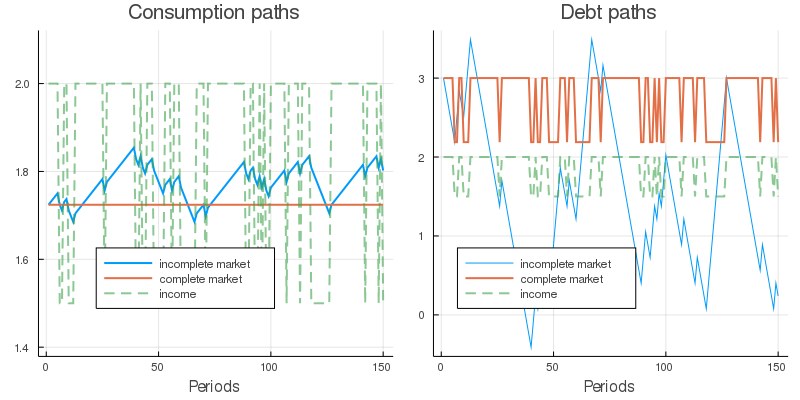

In [5]:
Random.seed!(42)
N_simul = 150
cp = ConsumptionProblem()

c̄, b1, b2 = consumption_complete(cp)
debt_complete = [b1, b2]

c_path, debt_path, y_path, s_path = consumption_incomplete(cp, N_simul=N_simul)

plt_cons = plot(title = "Consumption paths", xlabel = "Periods", ylim = [1.4,2.1])
plot!(plt_cons, 1:N_simul, c_path, label = "incomplete market", lw = 2)
plot!(plt_cons, 1:N_simul, fill(c̄, N_simul), label = "complete market", lw = 2)
plot!(plt_cons, 1:N_simul, y_path, label = "income", lw = 2, alpha = 0.6, linestyle = :dash)
plot!(plt_cons, legend = :bottom)

plt_debt = plot(title = "Debt paths", xlabel = "Periods")
plot!(plt_debt, 1:N_simul, debt_path, label = "incomplete market")
plot!(plt_debt, 1:N_simul, debt_complete[s_path], label = "complete market", lw = 2)
plot!(plt_debt, 1:N_simul, y_path, label = "income", lw = 2, alpha = 0.6, linestyle = :dash)
plot!(plt_debt, legend = :bottomleft)

plot(plt_cons, plt_debt, layout = (1,2), size = (800, 400))

No gráfico da esqueda, para o mesmo caminho amostral de receita não financeira $ y_t $, perceba que:

- o consumo é constante quando há mercados completos, mas é preciso caminhar aleatoriamente na versão de mercados incompletos do modelo.
- a dívida do consumidor oscila entre dois valores que são funções do estado de Markov no modelo de mercados completos, enquanto a dívida do consumidor oscila de maneira “raiz unitária” na economia de mercado incompleto.

#### Usando o Isomorfismo

Podemos simplesmente rotular variáveis para adquirir interpretações de suavização de impostos de nossos dois modelos.

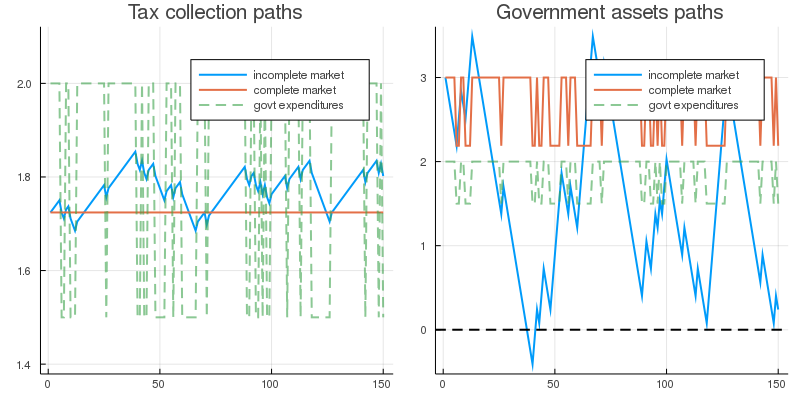

In [6]:
plt_tax = plot(title = "Tax collection paths", x_label = "Periods", ylim = [1.4,2.1])
plot!(plt_tax, 1:N_simul, c_path, label = "incomplete market", lw = 2)
plot!(plt_tax, 1:N_simul, fill(c̄, N_simul), label = "complete market", lw = 2)
plot!(plt_tax, 1:N_simul, y_path, label = "govt expenditures", alpha = .6, linestyle = :dash,
      lw = 2)

plt_gov = plot(title = "Government assets paths", x_label = "Periods")
plot!(plt_gov, 1:N_simul, debt_path, label = "incomplete market", lw = 2)
plot!(plt_gov, 1:N_simul, debt_complete[s_path], label = "complete market", lw = 2)
plot!(plt_gov, 1:N_simul, y_path, label = "govt expenditures", alpha = .6, linestyle = :dash,
      lw = 2)
hline!(plt_gov, [0], linestyle = :dash, color = :black, lw = 2, label = "")
plot(plt_tax, plt_gov, layout = (1,2), size = (800, 400))

## Exemplo: Suavização de Impostos com Mercados Completos

É útil focar em um exemplo simples de suavização de impostos com mercados completos.

Este exemplo ilustra como, em um modelo de mercados completos como o de Lucas e Stokey [[LS83]](https://julia.quantecon.org/../zreferences.html#lucasstokey1983), o governo compra seguros do setor privado.

> - A compra de seguro protege o governo contra a necessidade de aumentar os impostos muito alto ou emitir muito débito no evento de alto gasto do governo. 



Assumimos que as despesas do governo se movem entre dois valores $ G_1 < G_2 $, onde o estado de Markov $ 1 $ significa “paz” e o estado de Markov $ 2 $ significa “guerra”.

A restrição orcamentária do governo no estado de Markov $ i $ é:

$$
T_i + b_i = G_i + \sum_j Q_{ij} b_j
$$

onde

$$
Q_{ij} = \beta P_{ij}
$$

é o preço de uma unidade de produção no próximo período no estado $ j $ quando o estado de Markov de hoje é $ i $ e $ b_i $ é o nível de *ativos* do governo no estado de Markov $ i $.

Ou seja, $ b_i $ é a quantidade dos empréstimos de um período pertencentes ao governo que vencem no momento $ t $.

Como acima, assumiremos que o estado de Markov inicial é o estado $ 1 $.

Além disso, para simplificar nosso exemplo, definiremos o nível inicial de ativos do governo como $ 0 $, para que $ b_1 =0 $.

Aqui está o nosso código para calcular um exemplo quantitativo com zero dívida em tempo de paz:

In [7]:
# Parâmetros

β = .96
y = [1.0, 2.0]
b0 = 0.0
P = [0.8 0.2;
     0.4 0.6]

cp = ConsumptionProblem(β, y, b0, P)
Q = β * P
N_simul = 150

c̄, b1, b2 = consumption_complete(cp)
debt_complete = [b1, b2]

println("P = $P")
println("Q = $Q")
println("Govt expenditures in peace and war = $y")
println("Constant tax collections = $c̄")
println("Govt assets in two states = $debt_complete")

msg = """
Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.
"""
println(msg)

AS1 = Q[1, 2] * b2
println("Spending on Arrow war security in peace = $AS1")
AS2 = Q[2, 2] * b2
println("Spending on Arrow war security in war = $AS2")

println("\n")
println("Government tax collections plus asset levels in peace and war")
TB1 = c̄ + b1
println("T+b in peace = $TB1")
TB2 = c̄ + b2
println("T+b in war = $TB2")

println("\n")
println("Total government spending in peace and war")
G1= y[1] + AS1
G2 = y[2] + AS2
println("total govt spending in peace = $G1")
println("total govt spending in war = $G2")

println("\n")
println("Let's see ex post and ex ante returns on Arrow securities")

Π = 1 ./ Q    # recíprocos(Q)
exret = Π
println("Ex post returns to purchase of Arrow securities = $exret")
exant = Π .* P
println("Ex ante returns to purchase of Arrow securities = $exant")

P = [0.8 0.2; 0.4 0.6]
Q = [0.768 0.192; 0.384 0.576]
Govt expenditures in peace and war = [1.0, 2.0]
Constant tax collections = 1.3116883116883118
Govt assets in two states = [0.0, 1.6233766233766234]
Now let's check the government's budget constraint in peace and war.
Our assumptions imply that the government always purchases 0 units of the
Arrow peace security.

Spending on Arrow war security in peace = 0.3116883116883117
Spending on Arrow war security in war = 0.9350649350649349


Government tax collections plus asset levels in peace and war
T+b in peace = 1.3116883116883118
T+b in war = 2.9350649350649354


Total government spending in peace and war
total govt spending in peace = 1.3116883116883118
total govt spending in war = 2.935064935064935


Let's see ex post and ex ante returns on Arrow securities
Ex post returns to purchase of Arrow securities = [1.3020833333333333 5.208333333333333; 2.6041666666666665 1.7361111111111112]
Ex ante returns to purchase of Arrow securities = [1

### Explicação

Neste exemplo, o governo sempre compra $ 0 $ unidades dos seguros de Arrow que compensa em tempo de paz (estado de Markov $ 1 $).

Mas ele adquire uma quantidade positiva dos seguros que compensa em tempos de guerra (estado de Markov $ 2 $).

Recomendamos inserir as quantidades calculadas acima nas restrições orçamentárias do governo nos dois estados de Markov e em primeiro lugar.

Este é um exemplo em que o governo adquire um *seguro* contra a possibilidade de que a guerra comece ou continue:

- o seguro não compensa enquanto a paz continuar.
- o seguro compensa quando há guerra.


*Exercício:* tente alterar a matriz de transição de Markov para que:

$$
P = \begin{bmatrix}
        1 & 0 \\
       .2 & .8
    \end{bmatrix}
$$

Além disso, inicie o sistema no estado $ 2 $ (guerra) com ativos iniciais do governo $ - 10 $,  para que o governo inicie a guerra em dívida  $ b_2 = -10 $.

## Versão de Espaço de Estado Linear No Modelo de Mercados Completos

Agora, usaremos uma configuração como essa na [na primeira aula sobre renda permanente](https://julia.quantecon.org/perm_income.html).

Nesse modelo, havia:

- mercados incompletos: o consumidor poderia negociar apenas um único título de um período, com uma taxa de juros livre de risco bruta de um período igual a  $ \beta^{-1} $  
- a renda não financeira exógena do consumidor era governada por um modelo linear de espaço de estados impulsionado por choques gaussianos, o tipo de modelo estudado em uma aula anterior sobre [modelos de espaço de estado linear](https://julia.quantecon.org/../tools_and_techniques/linear_models.html)  


Vamos escrever uma contrapartida completa dos mercados desse modelo.

Então agora vamos supor que a receita não financeira seja governada pelo sistema espacial do estado:

$$
\begin{aligned}
     x_{t+1} & = A x_t + C w_{t+1} \cr
     y_t & = S_y x_t
\end{aligned}
$$

onde $ x_t $ é um vetor $ n \times 1 $ e $ w_{t+1} \sim {\cal N}(0,I) $ é IID no tempo.

Novamente, em contrapartida da hipótese de Hall-Barro de que a taxa de juros bruta livre de risco é $ \beta^{-1} $, assumimos que os preços escalados dos títulos Arrow de um período à frente sejam:


<a id='equation-cs-14'></a>
$$
p_{t+1}(x_{t+1} \,|\, x_t) = \beta \phi(x_{t+1} \,|\, A x_t, CC') \tag{15}
$$

onde $ \phi(\cdot \,|\, \mu, \Sigma) $ é uma distribuição gaussiana multivariada com vetor médio $ \mu $ e matriz de covariância
$ \Sigma $.

Seja $ b(x_{t+1}) $ um vetor de dívida devida de estado contigente em $ t+1 $
como uma função de $ t+1 $ estado $ x_{t+1} $.

Usando a função de precificação assumida em [(15)](#equation-cs-14), o valor em
$ t $ de $ b(x_{t+1}) $ é:

$$
\beta \int b(x_{t+1}) \phi(x_{t+1} \,|\, A x_t, CC') d x_{t+1} = \beta  \mathbb E_t b_{t+1}
$$

No cenário completo dos mercados, o consumidor enfrenta uma sequência de restrições orçamentárias.

$$
c_t + b_t = y_t + \beta \mathbb E_t b_{t+1}, t \geq 0
$$

Nós podemos resolver a restrição orcamentária no tempo $ t $ a frente para obter:

$$
b_t = \mathbb E_t  \sum_{j=0}^\infty \beta^j (y_{t+j} - c_{t+j} )
$$

Assumimos como antes que o consumidor se preocupa com o valor esperado de:

$$
\sum_{t=0}^\infty \beta^t u(c_t), \quad 0 < \beta < 1
$$

Na versão do modelo de mercados incompletos, assumimos que
$ u(c_t) = - (c_t -\gamma)^2 $, para que a utilidade funcional acima se torne:

$$
-\sum_{t=0}^\infty \beta^t ( c_t - \gamma)^2, \quad 0 < \beta < 1
$$

Mas na versão de mercados completos, podemos assumir uma forma mais geral da função de utilidade que satisfaz  $ u' > 0 $ e $ u'' < 0 $.

A condição de primeira ordem para o problema do consumidor com mercados completos e nossa suposição sobre os preços dos títulos da Arrow é:

$$
u'(c_{t+1}) = u'(c_t) \quad \text{for all }  t\geq 0
$$

que implica de novo $ c_t = \bar c $ para algum $ \bar c $.

Segue que:

$$
b_t = \mathbb E_t \sum_{j=0}^\infty \beta^j (y_{t+j} - \bar c)
$$

ou


<a id='equation-cs-15'></a>
$$
b_t = S_y (I - \beta A)^{-1} x_t - \frac{1}{1-\beta} \bar c \tag{16}
$$

onde o valor de $ \bar c $ satisfaz:


<a id='equation-cs-16'></a>
$$
\bar b_0 = S_y (I - \beta A)^{-1} x_0 - \frac{1}{1 - \beta } \bar c \tag{17}
$$

Onde $ \bar b_0 $ é um nível inicial da dívida do consumidor, especificado como um parâmetro do problema.

Assim, na versão de mercados completos do modelo de suavização de consumo, $ c_t = \bar c, \forall t \geq 0 $ é determinado por [(17)](#equation-cs-16)
e a dívida do consumidor é uma função fixa do estado $ x_t $ descrita por [(16)](#equation-cs-15).

Aqui está um exemplo que mostra como, nessa configuração, a disponibilidade de seguro contra receitas não financeiras flutuantes permite que o consumidor suavize completamente o consumo ao longo do tempo e *nos estados do mundo*.

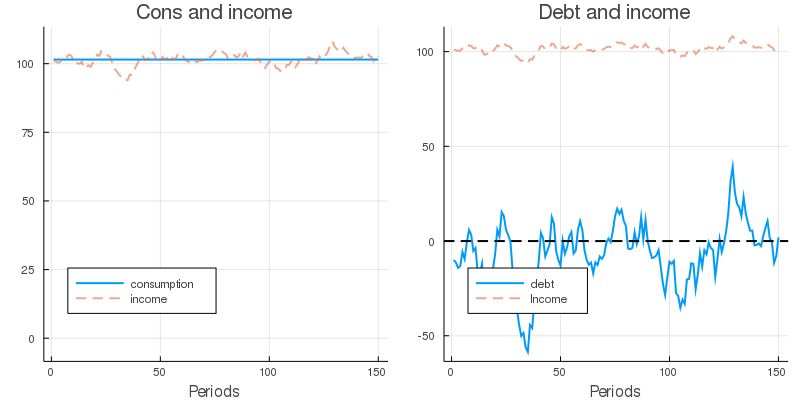

In [8]:
function complete_ss(β, b0, x0, A, C, S_y, T = 12)

    # Crie um espaço de estado linear para fins de simulação 
    # Isso adiciona "b" como um estado ao sistema de espaço de estados linear 
    # para que a configuração da semente coloque choques no mesmo lugar para 
    # ambas as economias de mercado completa e incompleta 
    # Atilde = vcat(hcat(A, zeros(size(A,1), 1)),
    #               zeros(1, size(A,2) + 1))
    # Ctilde = vcat(C, zeros(1, 1))
    # S_ytilde = hcat(S_y, zeros(1, 1))

    lss = LSS(A, C, S_y, mu_0=x0)

    # Adiciona um estado extra à condição inicial 
    # x0 = hcat(x0, 0)

    # computa o (I - β*A)^{-1}
    rm = inv(I - β * A)

    # Nível constante de consumo
    cbar = (1 - β) * (S_y * rm * x0 .- b0)
    c_hist = ones(T) * cbar[1]

    # Dívida
    x_hist, y_hist = simulate(lss, T)
    b_hist = (S_y * rm * x_hist .- cbar[1] / (1.0 - β))

    return c_hist, vec(b_hist), vec(y_hist), x_hist
end

N_simul = 150

# Defina os parâmetros
α, ρ1, ρ2 = 10.0, 0.9, 0.0
σ = 1.0
# N_simul = 1
# T = N_simul
A = [1.0 0.0 0.0;
     α    ρ1  ρ2;
     0.0 1.0 0.0]
C = [0.0, σ, 0.0]
S_y = [1.0 1.0 0.0]
β, b0 = 0.95, -10.0
x0 = [1.0, α / (1 - ρ1), α / (1 - ρ1)]

# Faça a simulação para parâmetros completos
out = complete_ss(β, b0, x0, A, C, S_y, 150)
c_hist_com, b_hist_com, y_hist_com, x_hist_com = out

# Gráficos de Consumo
plt_cons = plot(title = "Cons and income", xlabel = "Periods", ylim = [-5.0, 110])
plot!(plt_cons, 1:N_simul, c_hist_com, label = "consumption", lw = 2)
plot!(plt_cons, 1:N_simul, y_hist_com, label = "income",
      lw = 2, alpha = 0.6, linestyle = :dash)

# Gráficos de Dívida
plt_debt = plot(title = "Debt and income", xlabel = "Periods")
plot!(plt_debt, 1:N_simul, b_hist_com, label = "debt", lw = 2)
plot!(plt_debt, 1:N_simul, y_hist_com, label = "Income",
      lw = 2, alpha = 0.6, linestyle = :dash)
hline!(plt_debt, [0], color = :black, linestyle = :dash, lw = 2, label = "")
plot(plt_cons, plt_debt, layout = (1,2), size = (800, 400))
plot!(legend = :bottomleft)

### Interpretação do Gráfico

No gráfico acima, observe que:

- receita não financeira flutua de maneira estacionária.
- o consumo é completamente constante.
- a dívida do consumidor flutua de maneira estacionária; de fato, nesse caso, porque a receita não financeira é um processo autoregressivo de primeira ordem, a dívida do consumidor é uma função afetiva exata (significando linear mais uma constante) da receita não financeira do consumidor.

### A Versão de Mercados Incompletos

A versão do modelo para mercados incompletos, com a receita não financeira sendo governada por um sistema linear de espaço de estados, é descrita na primeira aula sobre o [modelo de renda permanente](https://julia.quantecon.org/perm_income.html) e na aula de acompanhamento sobre o [modelo de renda permanente](https://julia.quantecon.org/perm_income_cons.html).

Nessa versão, o consumo segue uma caminhada aleatória e a dívida do consumidor segue um processo com uma raiz unitária.

Deixamos ao leitor aplicar o isomorfismo usual para deduzir as implicações correspondentes para um modelo de suavização de impostos como o de Barro [[Bar79]](https://julia.quantecon.org/../zreferences.html#barro1979).

### Manipulação Governamental dos Preços dos Títulos Arrow 

Em [imposto ótimo em uma economia QL](https://julia.quantecon.org/../dynamic_programming_squared/lqramsey.html) e [imposto ótimo recursivo](https://julia.quantecon.org/../dynamic_programming_squared/opt_tax_recur.html), estudaremos modelos de **mercados completos** nos quais o governo reconhece que pode manipular os preços dos títulos da Arrow.

Em [imposto ótimo com mercados incompletos](https://julia.quantecon.org/../dynamic_programming_squared/amss.html), estudaremos um modelo de **mercados incompletos** em que o governo manipula os preços dos ativos.